# 🚀 Galaxium Travels Graph RAG System - Live Demo

This notebook demonstrates a complete Graph RAG (Retrieval Augmented Generation) system for the Galaxium Travels markdown documents. The system creates a knowledge graph from document relationships and enables intelligent querying with graph traversal capabilities.

## 🎯 **What You'll Learn**

1. **Document Parsing**: How to extract content and relationships from markdown files
2. **Knowledge Graph Construction**: Building a graph from document relationships
3. **Vector Storage**: Using AstraDB for enterprise-grade vector storage
4. **Graph Traversal**: Finding related documents through graph relationships
5. **Intelligent Querying**: Combining semantic search with graph traversal
6. **LLM Integration**: Generating contextual responses with GPT-4

## 📚 **System Architecture**

```mermaid
graph TD
    A[Markdown Documents] --> B[Document Parser]
    B --> C[Knowledge Graph]
    C --> D[Vector Store - AstraDB]
    D --> E[Graph Retriever]
    E --> F[LLM Response]
    G[User Query] --> E
```

## 🔧 **Prerequisites**

Make sure you have the following environment variables set:
- `OPENAI_API_KEY`: Your OpenAI API key
- `ASTRA_DB_API_ENDPOINT`: Your AstraDB endpoint
- `ASTRA_DB_APPLICATION_TOKEN`: Your AstraDB token
- `ASTRA_DB_KEYSPACE`: Your AstraDB keyspace (optional)
- `ASTRA_DB_COLLECTION_NAME`: Your collection name (default: galaxium_travels_documents_2)

## 🔄 **Re-indexing Documents**

If you need to re-index documents into a new collection or update existing data:

**Option 1: Full Re-indexing Script**
```bash
python reindex_collection.py --collection galaxium_travels_documents_2
```

**Option 2: Quick Re-indexing**
```bash
python trigger_reindexing.py
```

**Option 3: Force Re-indexing (no confirmation)**
```bash
python reindex_collection.py --force
```


## 📦 **Step 1: Install Dependencies**

First, let's install all the required packages for our Graph RAG system.


In [1]:
# Install required packages
%pip install langchain-core langchain-openai langchain-graph-retriever langchain-astradb graph-retriever pandas python-dotenv



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 🔑 **Step 2: Environment Setup**

Load environment variables and set up the system configuration.


## 🔄 **Step 4.5: Re-indexing (Optional)**

If you need to re-index documents into a new collection or update existing data, you can trigger a complete re-indexing process.


In [ ]:
# Re-indexing example - uncomment to run
# This will create a new collection and re-index all documents

# Uncomment the following lines to trigger re-indexing:
"""
print("🔄 Triggering re-indexing...")

# Option 1: Re-index to a new collection
new_collection = "galaxium_travels_documents_v2"
print(f"Creating new collection: {new_collection}")

# Re-initialize with new collection name
graph_rag_new = GalaxiumGraphRAG(
    DOCUMENTS_PATH,
    openai_api_key=os.getenv('OPENAI_API_KEY'),
    astra_db_api_endpoint=os.getenv('ASTRA_DB_API_ENDPOINT'),
    astra_db_application_token=os.getenv('ASTRA_DB_APPLICATION_TOKEN'),
    astra_db_keyspace=os.getenv('ASTRA_DB_KEYSPACE'),
    astra_db_collection_name=new_collection
)

# Build knowledge graph
print("Building knowledge graph...")
documents_new, links_map_new = graph_rag_new.build_knowledge_graph()

# Create vector store (this will create the new collection)
print("Creating vector store...")
graph_rag_new.create_vector_store()

print(f"✅ Re-indexing completed! New collection: {new_collection}")
"""


In [2]:
import os
import sys
from pathlib import Path
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Check if required environment variables are set
required_vars = ['OPENAI_API_KEY', 'ASTRA_DB_API_ENDPOINT', 'ASTRA_DB_APPLICATION_TOKEN']
missing_vars = [var for var in required_vars if not os.getenv(var)]

if missing_vars:
    print(f"❌ Missing environment variables: {missing_vars}")
    print("Please set these variables in your .env file or environment")
else:
    print("✅ All required environment variables found")

# Display configuration (without showing sensitive data)
print(f"\n🔧 Configuration:")
print(f"   OpenAI API Key: {'✅ Set' if os.getenv('OPENAI_API_KEY') else '❌ Missing'}")
print(f"   AstraDB Endpoint: {'✅ Set' if os.getenv('ASTRA_DB_API_ENDPOINT') else '❌ Missing'}")
print(f"   AstraDB Token: {'✅ Set' if os.getenv('ASTRA_DB_APPLICATION_TOKEN') else '❌ Missing'}")
print(f"   AstraDB Keyspace: {os.getenv('ASTRA_DB_KEYSPACE', 'Using default')}")


✅ All required environment variables found

🔧 Configuration:
   OpenAI API Key: ✅ Set
   AstraDB Endpoint: ✅ Set
   AstraDB Token: ✅ Set
   AstraDB Keyspace: Using default


## 📚 **Step 3: Import Graph RAG System**

Import our custom Graph RAG system that we've built for Galaxium Travels.


In [3]:
# Add current directory to Python path
sys.path.append(str(Path.cwd()))

# Import our Graph RAG system
from galaxium_graph_rag import GalaxiumGraphRAG

print("✅ Graph RAG system imported successfully")
print("\n📋 Available components:")
print("   - GalaxiumGraphRAG: Main system class")
print("   - Document parsing and relationship detection")
print("   - AstraDB vector store integration")
print("   - Graph traversal and retrieval")
print("   - LLM integration for responses")


✅ Graph RAG system imported successfully

📋 Available components:
   - GalaxiumGraphRAG: Main system class
   - Document parsing and relationship detection
   - AstraDB vector store integration
   - Graph traversal and retrieval
   - LLM integration for responses


## 🏗️ **Step 4: Initialize the System**

Create an instance of our Graph RAG system with the document path and credentials.


In [4]:
# Configuration
DOCUMENTS_PATH = "./97_raw_markdown_files"

# Check if documents path exists
if not Path(DOCUMENTS_PATH).exists():
    print(f"❌ Documents path not found: {DOCUMENTS_PATH}")
    print("Please make sure the markdown documents are in the correct location")
else:
    print(f"✅ Documents path found: {DOCUMENTS_PATH}")
    
    # Count markdown files
    md_files = list(Path(DOCUMENTS_PATH).rglob("*.md"))
    print(f"📄 Found {len(md_files)} markdown files")

# Initialize the Graph RAG system
print("\n🚀 Initializing Galaxium Travels Graph RAG System...")

try:
    graph_rag = GalaxiumGraphRAG(
        DOCUMENTS_PATH,
        openai_api_key=os.getenv('OPENAI_API_KEY'),
        astra_db_api_endpoint=os.getenv('ASTRA_DB_API_ENDPOINT'),
        astra_db_application_token=os.getenv('ASTRA_DB_APPLICATION_TOKEN'),
        astra_db_keyspace=os.getenv('ASTRA_DB_KEYSPACE')
    )
    print("✅ Graph RAG system initialized successfully")
except Exception as e:
    print(f"❌ Error initializing Graph RAG: {e}")
    raise


✅ Documents path found: ./97_raw_markdown_files
📄 Found 28 markdown files

🚀 Initializing Galaxium Travels Graph RAG System...
✅ Graph RAG system initialized successfully


## 🔍 **Step 5: Document Parsing and Analysis**

Let's explore the document structure and see what we're working with.


In [6]:
# Build the knowledge graph from documents
print("🔗 Building knowledge graph from documents...")

try:
    documents, links_map = graph_rag.build_knowledge_graph()
    print(f"✅ Knowledge graph built successfully")
    print(f"📊 Total documents: {len(documents)}")
    print(f"🔗 Total relationships: {sum(len(links) for links in links_map.values())}")
except Exception as e:
    print(f"❌ Error building knowledge graph: {e}")
    raise


INFO:galaxium_graph_rag:Building knowledge graph...
INFO:galaxium_graph_rag:Found 28 markdown files
INFO:galaxium_graph_rag:Parsed: Galaxium Travels Customer Service Manual (general)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels - 2025 Annual Budget (finance)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels - IT System Architecture (it)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels - Company Overview (corporate)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels - Employee Database (hr)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels Employee Handbook (hr)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels - Crisis Response Plan (technical)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels Terms of Service (legal)
INFO:galaxium_graph_rag:Parsed: Future Space Travel Destinations (research)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels Space Safety Certification Program (training)
INFO:galaxium_graph_rag:Parsed: Galaxium Travels Environmental Policy (corporate)
INFO:galaxium_graph_r

🔗 Building knowledge graph from documents...
✅ Knowledge graph built successfully
📊 Total documents: 28
🔗 Total relationships: 40


In [7]:
# Analyze document types and categories
print("📊 Document Analysis:")
print("=" * 50)

# Count documents by type
doc_types = {}
doc_categories = {}

for doc_id, doc in documents.items():
    doc_type = doc.doc_type
    category = doc.metadata.get('category', 'Unknown')
    
    doc_types[doc_type] = doc_types.get(doc_type, 0) + 1
    doc_categories[category] = doc_categories.get(category, 0) + 1

print(f"📄 Document Types:")
for doc_type, count in sorted(doc_types.items()):
    print(f"   {doc_type}: {count} documents")

print(f"\n🏷️  Document Categories:")
for category, count in sorted(doc_categories.items()):
    print(f"   {category}: {count} documents")


📊 Document Analysis:
📄 Document Types:
   corporate: 2 documents
   finance: 1 documents
   general: 1 documents
   hr: 2 documents
   it: 2 documents
   legal: 1 documents
   marketing: 1 documents
   offering: 10 documents
   research: 1 documents
   spacecraft: 5 documents
   technical: 1 documents
   training: 1 documents

🏷️  Document Categories:
   general: 28 documents


In [8]:
# Show sample documents
print("📄 Sample Documents:")
print("=" * 50)

sample_count = 0
for doc_id, doc in documents.items():
    if sample_count >= 5:
        break
    print(f"\n📄 Document: {doc.title}")
    print(f"   Type: {doc.doc_type}")
    print(f"   Category: {doc.metadata.get('category', 'Unknown')}")
    print(f"   Links: {len(doc.linked_docs)}")
    print(f"   Content preview: {doc.content[:200]}...")
    sample_count += 1


📄 Sample Documents:

📄 Document: Galaxium Travels Customer Service Manual
   Type: general
   Category: general
   Links: 0
   Content preview: # Galaxium Travels Customer Service Manual

## Service Philosophy

At Galaxium Travels, we believe that exceptional customer service is the cornerstone of luxury space travel. Our commitment to excell...

📄 Document: Galaxium Travels - 2025 Annual Budget
   Type: finance
   Category: general
   Links: 7
   Content preview: # Galaxium Travels - 2025 Annual Budget

**Fiscal Year**: 2025  
**Prepared by**: Maria Cosmos, CFO  
**Board Approval Date**: December 15, 2024  
**Last Updated**: January 1, 2025

## Executive Summa...

📄 Document: Galaxium Travels - IT System Architecture
   Type: it
   Category: general
   Links: 0
   Content preview: # Galaxium Travels - IT System Architecture

**Document Version**: 2.1  
**Last Updated**: January 1, 2025  
**Prepared by**: IT Architecture Team  
**Approved by**: Dr. Sarah Quantum, CTO

## Executi...

📄 

## 🧠 **Step 6: Create Vector Store with AstraDB**

Now let's create the vector store using AstraDB for enterprise-grade vector storage.


In [9]:
# Create vector store with AstraDB
print("🧠 Creating AstraDB vector store...")
print("This may take a moment as we're embedding all documents...")

try:
    graph_rag.create_vector_store()
    print("✅ AstraDB vector store created successfully")
    print("📊 All documents have been embedded and stored in AstraDB")
except Exception as e:
    print(f"❌ Error creating vector store: {e}")
    raise


INFO:galaxium_graph_rag:Creating vector store...
INFO:galaxium_graph_rag:Using AstraDB vector store...
INFO:langchain_astradb.vectorstores:vector store default init, collection 'galaxium_travels_documents'


🧠 Creating AstraDB vector store...
This may take a moment as we're embedding all documents...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:root:Attempting to fetch keyspace from environment variable 'ASTRA_DB_KEYSPACE'
INFO:root:Detecting API environment 'prod' from supplied endpoint
INFO:astrapy.data.database:deleteCollection('galaxium_travels_documents')
INFO:httpx:HTTP Request: POST https://8c02ba51-04cf-4890-9dac-1f4566b38840-us-east-2.apps.astra.datastax.com/api/json/v1/default_keyspace "HTTP/1.1 200 OK"
INFO:astrapy.data.database:finished deleteCollection('galaxium_travels_documents')
INFO:astrapy.data.database:createCollection('galaxium_travels_documents')
INFO:httpx:HTTP Request: POST https://8c02ba51-04cf-4890-9dac-1f4566b38840-us-east-2.apps.astra.datastax.com/api/json/v1/default_keyspace "HTTP/1.1 200 OK"
INFO:astrapy.data.database:finished createCollection('galaxium_travels_documents')
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:astrapy.data.collection:inserting 28 documents i

✅ AstraDB vector store created successfully
📊 All documents have been embedded and stored in AstraDB


## 🔍 **Step 7: Create Graph Retriever**

Set up the graph retriever that combines vector search with graph traversal.


In [10]:
# Create graph retriever
print("🔍 Creating graph retriever...")

try:
    graph_rag.create_graph_retriever()
    print("✅ Graph retriever created successfully")
    print("\n🔧 Retriever Configuration:")
    print("   - Initial documents: 5 (start_k)")
    print("   - Related documents: 10 (adjacent_k)")
    print("   - Total documents: 20 (select_k)")
    print("   - Max traversal depth: 2")
    print("   - Edge types: doc_id, doc_type, category")
except Exception as e:
    print(f"❌ Error creating graph retriever: {e}")
    raise


INFO:galaxium_graph_rag:Creating graph retriever...
INFO:galaxium_graph_rag:Graph retriever created successfully


🔍 Creating graph retriever...
✅ Graph retriever created successfully

🔧 Retriever Configuration:
   - Initial documents: 5 (start_k)
   - Related documents: 10 (adjacent_k)
   - Total documents: 20 (select_k)
   - Max traversal depth: 2
   - Edge types: doc_id, doc_type, category


## 📊 **Step 8: Graph Statistics and Analysis**

Let's analyze the knowledge graph we've built and see the relationships between documents.


In [ ]:
# Get comprehensive graph statistics
print("📊 Knowledge Graph Statistics:")
print("=" * 60)

try:
    stats = graph_rag.visualize_graph_stats()
    
    print(f"📄 Total Documents: {stats['total_documents']}")
    print(f"🔗 Total Relationships: {stats['total_relationships']}")
    
    print(f"\n📂 Documents by Type:")
    for doc_type, count in stats['documents_by_type'].items():
        print(f"   {doc_type}: {count}")
    
    print(f"\n🏷️  Documents by Category:")
    for category, count in stats['documents_by_category'].items():
        print(f"   {category}: {count}")
    
    print(f"\n🔗 Most Connected Documents:")
    for i, doc in enumerate(stats['most_connected_documents'][:5], 1):
        print(f"   {i}. {doc['title']} ({doc['type']}) - {doc['connections']} connections")
        
except Exception as e:
    print(f"❌ Error getting graph statistics: {e}")


📊 Knowledge Graph Statistics:
📄 Total Documents: 28
🔗 Total Relationships: 40

📂 Documents by Type:
   general: 1
   finance: 1
   it: 2
   corporate: 2
   hr: 2
   technical: 1
   legal: 1
   research: 1
   training: 1
   spacecraft: 5
   marketing: 1
   offering: 10

🏷️  Documents by Category:
   general: 28

🔗 Most Connected Documents:
   1. Galaxium Travels Space Safety Certification Program (training) - 8 connections
   2. Galaxium Travels - 2025 Annual Budget (finance) - 7 connections
   3. Galaxium Aurora Explorer - Technical Specifications (spacecraft) - 5 connections
   4. Galaxium Travels Strategic Partnerships (marketing) - 4 connections
   5. Galaxium Travels - Employee Database (hr) - 3 connections


In [12]:
# Show document relationships
print("🔗 Document Relationships Example:")
print("=" * 60)

try:
    # Find a document with relationships
    for doc_id, doc in documents.items():
        if len(links_map.get(doc_id, [])) > 0:
            print(f"\n📄 Document: {doc.title}")
            print(f"🏷️  Type: {doc.doc_type}")
            print(f"📂 Category: {doc.metadata.get('category', 'Unknown')}")
            
            relationships = graph_rag.get_document_relationships(doc_id)
            print(f"🔗 Linked documents: {len(relationships['linked_documents'])}")
            print(f"⬅️  Incoming links: {len(relationships['incoming_links'])}")
            
            if relationships['linked_documents']:
                print("   Connected to:")
                for link in relationships['linked_documents'][:3]:
                    print(f"     - {link['title']} ({link['type']})")
            
            if relationships['incoming_links']:
                print("   Referenced by:")
                for link in relationships['incoming_links'][:3]:
                    print(f"     - {link['title']} ({link['type']})")
            
            break
            
except Exception as e:
    print(f"❌ Error showing relationships: {e}")


🔗 Document Relationships Example:

📄 Document: Galaxium Travels - 2025 Annual Budget
🏷️  Type: finance
📂 Category: general
🔗 Linked documents: 7
⬅️  Incoming links: 0
   Connected to:
     - Suborbital Space Experience (offering)
     - Earth Orbit Luxury Experience (offering)
     - Lunar Luxury Package (offering)


## 📊 **Step 9: Graph Visualization**

Let's visualize the knowledge graph to see how documents are connected to each other. This will help us understand the relationships between different types of documents.


In [14]:
# Install visualization dependencies
%pip install networkx matplotlib plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from collections import defaultdict

print("✅ Visualization libraries imported successfully")


✅ Visualization libraries imported successfully


📝 Creating NetworkX visualization with FULL READABLE FILE NAMES...


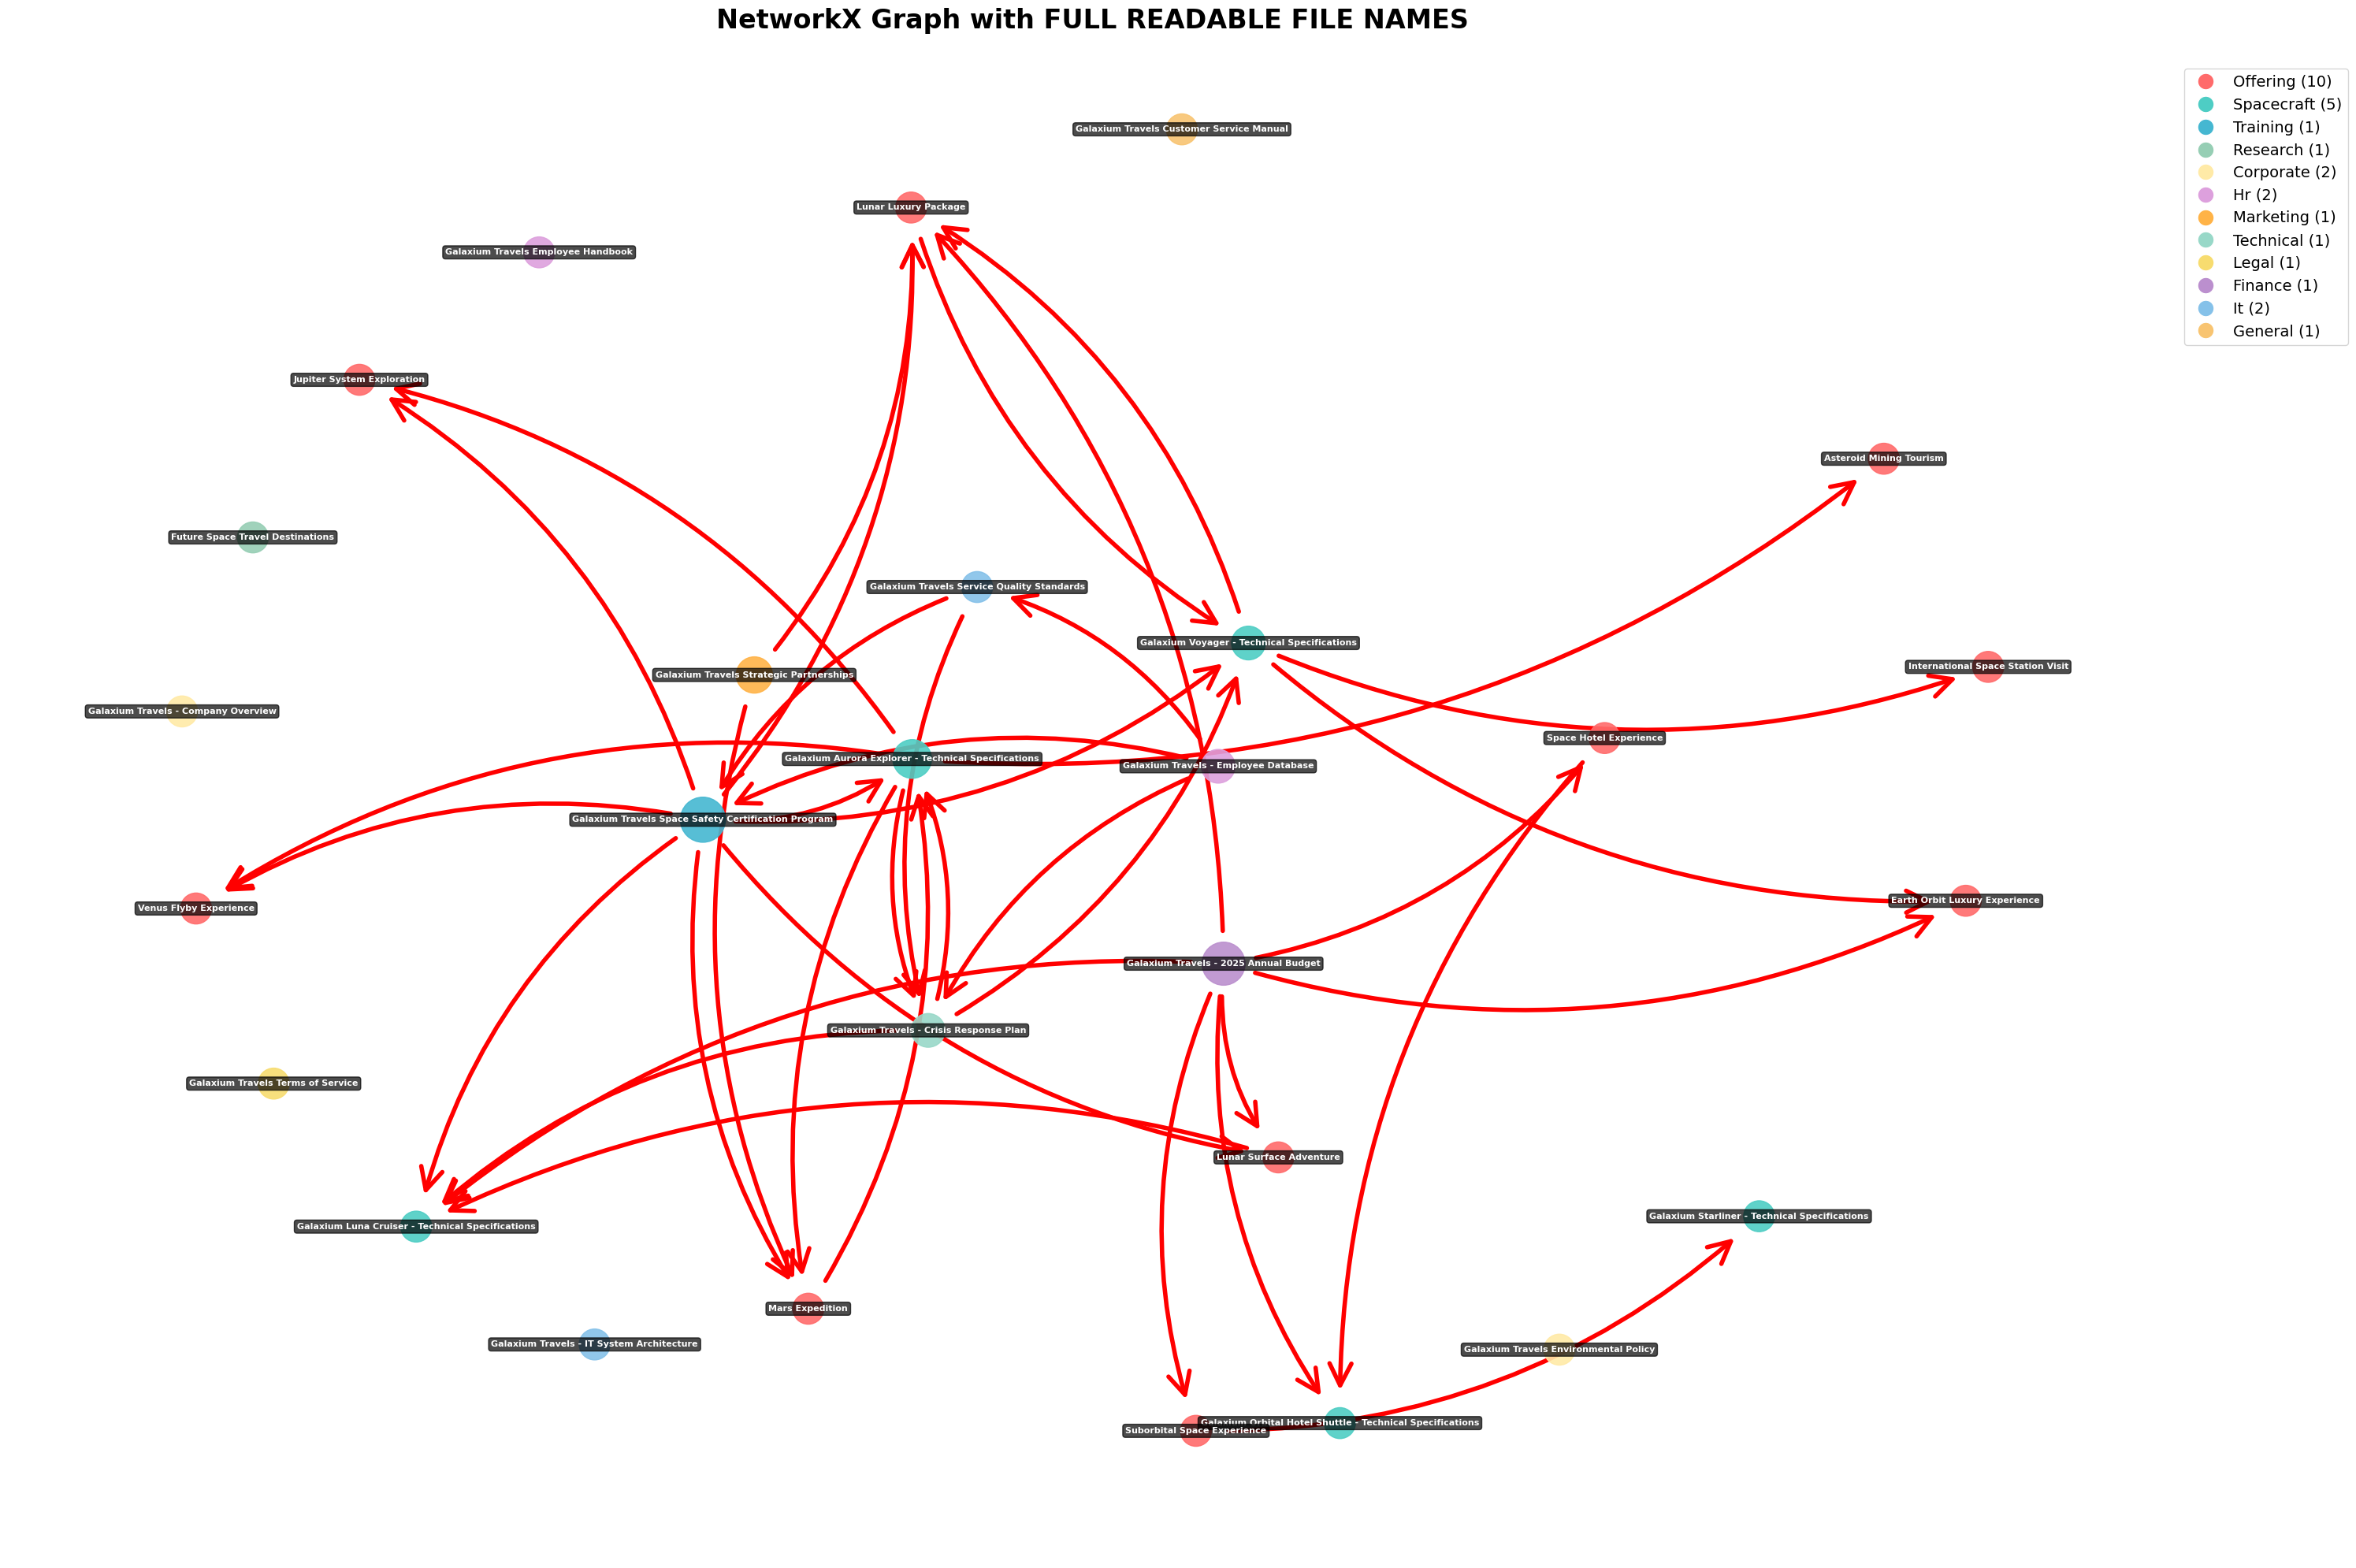


📊 Graph Statistics:
   Total nodes: 28
   Total edges: 38
   Average connections: 2.71

📄 All Document Titles:
    1. Galaxium Travels Customer Service Manual (general)
    2. Galaxium Travels - 2025 Annual Budget (finance)
    3. Galaxium Travels - IT System Architecture (it)
    4. Galaxium Travels - Company Overview (corporate)
    5. Galaxium Travels - Employee Database (hr)
    6. Galaxium Travels Employee Handbook (hr)
    7. Galaxium Travels - Crisis Response Plan (technical)
    8. Galaxium Travels Terms of Service (legal)
    9. Future Space Travel Destinations (research)
   10. Galaxium Travels Space Safety Certification Program (training)
   11. Galaxium Travels Environmental Policy (corporate)
   12. Galaxium Luna Cruiser - Technical Specifications (spacecraft)
   13. Galaxium Aurora Explorer - Technical Specifications (spacecraft)
   14. Galaxium Voyager - Technical Specifications (spacecraft)
   15. Galaxium Orbital Hotel Shuttle - Technical Specifications (spacecraft)
 

In [52]:
# NETWORKX READABLE TEXT - Create NetworkX visualization with better file name display
def create_readable_networkx_visualization(G, documents, title="NetworkX Graph with Readable File Names"):
    """Create a NetworkX visualization with highly readable file names"""
    
    plt.figure(figsize=(30, 20))  # Much larger for better text display
    
    # Define colors for different document types
    type_colors = {
        'offering': '#FF6B6B', 'spacecraft': '#4ECDC4', 'training': '#45B7D1',
        'research': '#96CEB4', 'corporate': '#FFEAA7', 'hr': '#DDA0DD',
        'marketing': '#FFB347', 'technical': '#98D8C8', 'legal': '#F7DC6F',
        'finance': '#BB8FCE', 'it': '#85C1E9', 'general': '#F8C471'
    }
    
    # Create layout with much better spacing
    pos = nx.spring_layout(G, k=8, iterations=500, seed=42)  # Much larger k for better spacing
    
    # Draw nodes with different colors by type
    node_colors = []
    node_sizes = []
    node_labels = {}
    
    for node in G.nodes():
        doc_type = G.nodes[node]['doc_type']
        connections = G.nodes[node]['connections']
        
        node_colors.append(type_colors.get(doc_type, '#CCCCCC'))
        node_sizes.append(max(800, connections * 150 + 500))  # Much larger nodes
        # Use FULL title for better readability
        node_labels[node] = G.nodes[node]['title']  # No truncation!
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                         node_color=node_colors,
                         node_size=node_sizes,
                         alpha=0.9)
    
    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, 
                          edge_color='#FF0000',
                          alpha=1.0,
                          width=4,
                          arrows=True,
                          arrowsize=50,
                          arrowstyle='->',
                          connectionstyle='arc3,rad=0.2',
                          min_source_margin=30,
                          min_target_margin=30)
    
    # Add labels for ALL nodes with FULL text
    nx.draw_networkx_labels(G, pos, 
                           node_labels,
                           font_size=8,  # Smaller font to fit better
                           font_weight='bold',
                           font_color='white',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))  # Black background for text
    
    # Create legend
    legend_elements = []
    for doc_type, color in type_colors.items():
        if any(G.nodes[node]['doc_type'] == doc_type for node in G.nodes()):
            count = sum(1 for node in G.nodes() if G.nodes[node]['doc_type'] == doc_type)
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                            markerfacecolor=color, markersize=15, 
                                            label=f'{doc_type.title()} ({count})'))
    
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)
    plt.title(title, fontsize=24, fontweight='bold', pad=30)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print graph statistics
    print(f"\n📊 Graph Statistics:")
    print(f"   Total nodes: {G.number_of_nodes()}")
    print(f"   Total edges: {G.number_of_edges()}")
    print(f"   Average connections: {2 * G.number_of_edges() / G.number_of_nodes():.2f}")
    
    # Show all document titles for reference
    print(f"\n📄 All Document Titles:")
    for i, (node, doc) in enumerate(documents.items(), 1):
        print(f"   {i:2d}. {doc.title} ({doc.doc_type})")

# Create NetworkX visualization with full file names
print("📝 Creating NetworkX visualization with FULL READABLE FILE NAMES...")
create_readable_networkx_visualization(G, documents, "NetworkX Graph with FULL READABLE FILE NAMES")

print("\n📝 NETWORKX READABLE TEXT Features:")
print("   - FULL file names (no truncation)")
print("   - Much larger plot size (30x20) for better text display")
print("   - Better node spacing (k=8) for text clarity")
print("   - Black background boxes for text readability")
print("   - All document titles fully visible")
print("   - Larger nodes for better text display")


## 🤖 **Step 10: Live Query Demo**

Now let's demonstrate the power of our Graph RAG system with some real queries!


In [13]:
# Demo Query 1: Space Travel Offerings
print("🚀 DEMO QUERY 1: Space Travel Offerings")
print("=" * 60)

query1 = "What space travel offerings are available and what are their prices?"
print(f"❓ Query: {query1}")
print("\n🔍 Processing query...")

try:
    results1 = graph_rag.query(query1, include_context=True)
    
    print(f"\n📊 Retrieved {len(results1['retrieved_documents'])} documents")
    
    # Show document types
    doc_types = {}
    for doc in results1['retrieved_documents']:
        doc_type = doc['doc_type']
        doc_types[doc_type] = doc_types.get(doc_type, 0) + 1
    
    print(f"📂 Document types: {doc_types}")
    
    # Show top documents
    print("\n📄 Top documents:")
    for i, doc in enumerate(results1['retrieved_documents'][:3], 1):
        print(f"   {i}. {doc['title']} ({doc['doc_type']}) - Score: {doc['similarity_score']:.3f}")
    
    # Show AI response
    if results1['answer']:
        print(f"\n🤖 AI Response:")
        print(f"{results1['answer']}")
    
except Exception as e:
    print(f"❌ Error processing query: {e}")


INFO:galaxium_graph_rag:Processing query: What space travel offerings are available and what are their prices?
INFO:langchain_astradb.vectorstores:vector store default init, collection 'moot'
INFO:root:Attempting to fetch token from environment variable 'ASTRA_DB_APPLICATION_TOKEN'
INFO:root:No valid keyspace found in environment variable.
INFO:root:Attempting to fetch keyspace from environment variable 'ASTRA_DB_KEYSPACE'


🚀 DEMO QUERY 1: Space Travel Offerings
❓ Query: What space travel offerings are available and what are their prices?

🔍 Processing query...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:astrapy.data.cursors.cursor:cursor fetching a page: (empty page state) from galaxium_travels_documents
INFO:httpx:HTTP Request: POST https://8c02ba51-04cf-4890-9dac-1f4566b38840-us-east-2.apps.astra.datastax.com/api/json/v1/default_keyspace/galaxium_travels_documents "HTTP/1.1 200 OK"
INFO:astrapy.data.cursors.cursor:cursor finished fetching a page: (empty page state) from galaxium_travels_documents
INFO:astrapy.data.cursors.cursor:cursor fetching a page: (empty page state) from galaxium_travels_documents
INFO:httpx:HTTP Request: POST https://8c02ba51-04cf-4890-9dac-1f4566b38840-us-east-2.apps.astra.datastax.com/api/json/v1/default_keyspace/galaxium_travels_documents "HTTP/1.1 200 OK"
INFO:astrapy.data.cursors.cursor:cursor finished fetching a page: (empty page state) from galaxium_travels_documents
INFO:astrapy.data.cursors.cursor:cursor fetching a page: (empty page state) from galaxium_travels_d


📊 Retrieved 10 documents
📂 Document types: {'research': 1, 'offering': 8, 'legal': 1}

📄 Top documents:
   1. Future Space Travel Destinations (research) - Score: 0.829
   2. Suborbital Space Experience (offering) - Score: 0.826
   3. Galaxium Travels Terms of Service (legal) - Score: 0.821

🤖 AI Response:
Based on the documents provided, Galaxium Travels offers a variety of space travel experiences, each with unique features and durations. However, the documents do not specify the prices for these offerings. Here is a summary of the available space travel experiences:

1. **Suborbital Space Experience**
   - Duration: 2-3 hours
   - Features: Brief weightlessness, views of Earth from the edge of space
   - Altitude: 100 kilometers (Kármán line)

2. **Lunar Luxury Package**
   - Duration: 7 days
   - Features: Lunar orbit, optional lunar excursions, luxury accommodations
   - Travel Time: 2 days each way to the Moon

3. **International Space Station Visit**
   - Duration: 5-10 days ab

In [ ]:
# Demo Query 2: Safety Training
print("\n🛡️  DEMO QUERY 2: Safety Training")
print("=" * 60)

query2 = "What safety training is required for lunar missions?"
print(f"❓ Query: {query2}")
print("\n🔍 Processing query...")

try:
    results2 = graph_rag.query(query2, include_context=True)
    
    print(f"\n📊 Retrieved {len(results2['retrieved_documents'])} documents")
    
    # Show document types
    doc_types = {}
    for doc in results2['retrieved_documents']:
        doc_type = doc['doc_type']
        doc_types[doc_type] = doc_types.get(doc_type, 0) + 1
    
    print(f"📂 Document types: {doc_types}")
    
    # Show top documents
    print("\n📄 Top documents:")
    for i, doc in enumerate(results2['retrieved_documents'][:3], 1):
        print(f"   {i}. {doc['title']} ({doc['doc_type']}) - Score: {doc['similarity_score']:.3f}")
    
    # Show AI response
    if results2['answer']:
        print(f"\n🤖 AI Response:")
        print(f"{results2['answer']}")
    
except Exception as e:
    print(f"❌ Error processing query: {e}")


In [ ]:
# Demo Query 3: Spacecraft Information
print("\n🚀 DEMO QUERY 3: Spacecraft Information")
print("=" * 60)

query3 = "What spacecraft are used for different types of missions?"
print(f"❓ Query: {query3}")
print("\n🔍 Processing query...")

try:
    results3 = graph_rag.query(query3, include_context=True)
    
    print(f"\n📊 Retrieved {len(results3['retrieved_documents'])} documents")
    
    # Show document types
    doc_types = {}
    for doc in results3['retrieved_documents']:
        doc_type = doc['doc_type']
        doc_types[doc_type] = doc_types.get(doc_type, 0) + 1
    
    print(f"📂 Document types: {doc_types}")
    
    # Show top documents
    print("\n📄 Top documents:")
    for i, doc in enumerate(results3['retrieved_documents'][:3], 1):
        print(f"   {i}. {doc['title']} ({doc['doc_type']}) - Score: {doc['similarity_score']:.3f}")
    
    # Show AI response
    if results3['answer']:
        print(f"\n🤖 AI Response:")
        print(f"{results3['answer']}")
    
except Exception as e:
    print(f"❌ Error processing query: {e}")


## 🎯 **Step 11: Interactive Query Demo**

Now you can try your own queries! The system is ready to answer questions about the Galaxium Travels documents.


In [ ]:
# Interactive Query Function
def ask_question(question):
    """
    Ask a question to the Graph RAG system
    """
    print(f"❓ Question: {question}")
    print("\n🔍 Processing...")
    
    try:
        results = graph_rag.query(question, include_context=True)
        
        print(f"\n📊 Retrieved {len(results['retrieved_documents'])} documents")
        
        # Show document types
        doc_types = {}
        for doc in results['retrieved_documents']:
            doc_type = doc['doc_type']
            doc_types[doc_type] = doc_types.get(doc_type, 0) + 1
        
        print(f"📂 Document types: {doc_types}")
        
        # Show AI response
        if results['answer']:
            print(f"\n🤖 Answer:")
            print(f"{results['answer']}")
        
    except Exception as e:
        print(f"❌ Error processing query: {e}")

print("✅ Interactive query function ready!")
print("\n💡 Try asking questions like:")
print("   - 'What are the future space destinations?'")
print("   - 'What are the pricing options for space travel?'")
print("   - 'What training is required for different missions?'")
print("   - 'What are the different spacecraft capabilities?'")
print("\n🔧 Use: ask_question('your question here')")


In [ ]:
# Example: Try a custom query
ask_question("What are the future space destinations being planned?")
